<a href="https://colab.research.google.com/github/brennomongero/alura-git/blob/master/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [64]:
alucar = pd.read_csv('alucar.csv')
alucar.head(10)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63
5,2017-06-30,81
6,2017-07-31,101
7,2017-08-31,124
8,2017-09-30,148
9,2017-10-31,174


In [65]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

<Axes: xlabel='mes', ylabel='vendas'>

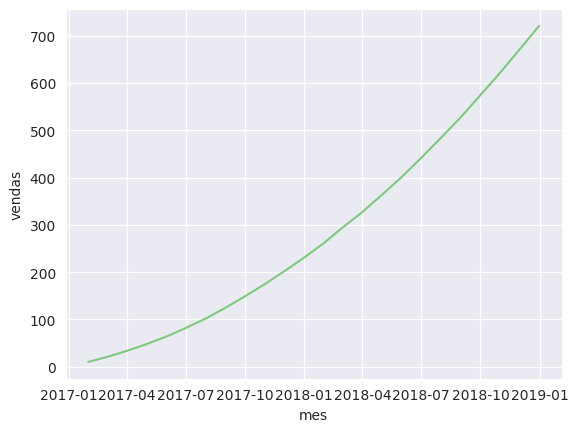

In [66]:
sns.lineplot(x='mes', y='vendas', data=alucar)

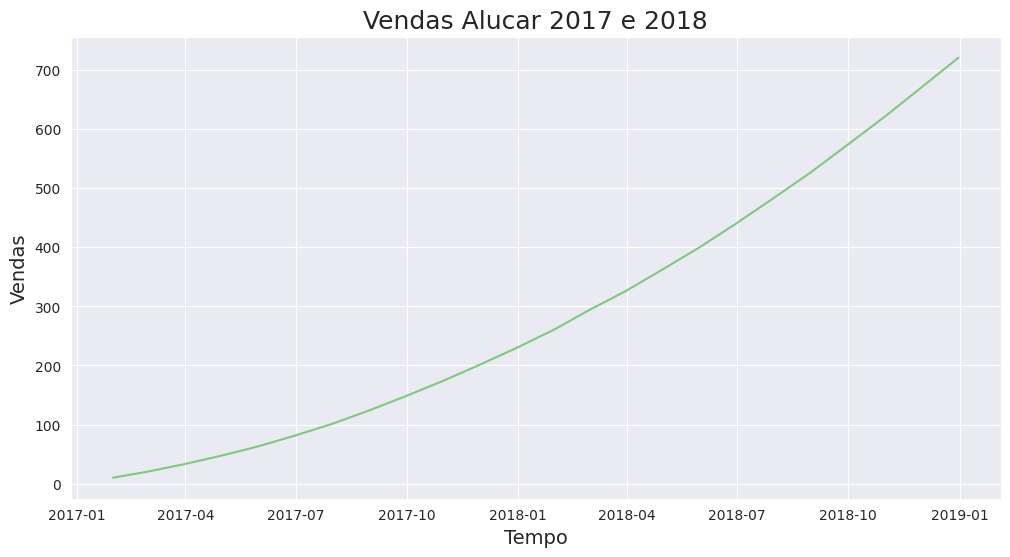

In [67]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title ('Vendas Alucar 2017 e 2018', loc='center',fontsize=18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Vendas', fontsize = 14)
ax = ax

In [68]:
af = pd.DataFrame(alucar)
af['crescimento_direto'] = af.vendas.pct_change()
af.head(10)

,mes,vendas,crescimento_direto
0,2017-01-31,10,NaN
1,2017-02-28,20,1.000000
2,2017-03-31,33,0.650000
3,2017-04-30,47,0.424242
4,2017-05-31,63,0.340426
5,2017-06-30,81,0.285714
6,2017-07-31,101,0.246914
7,2017-08-31,124,0.227723
8,2017-09-30,148,0.193548
9,2017-10-31,174,0.175676


In [69]:
alucar['aumento'] = alucar.vendas.diff()
alucar.head(10)

,mes,vendas,crescimento_direto,aumento
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,1.000000,10.0
2,2017-03-31,33,0.650000,13.0
3,2017-04-30,47,0.424242,14.0
4,2017-05-31,63,0.340426,16.0
5,2017-06-30,81,0.285714,18.0
6,2017-07-31,101,0.246914,20.0
7,2017-08-31,124,0.227723,23.0
8,2017-09-30,148,0.193548,24.0
9,2017-10-31,174,0.175676,26.0


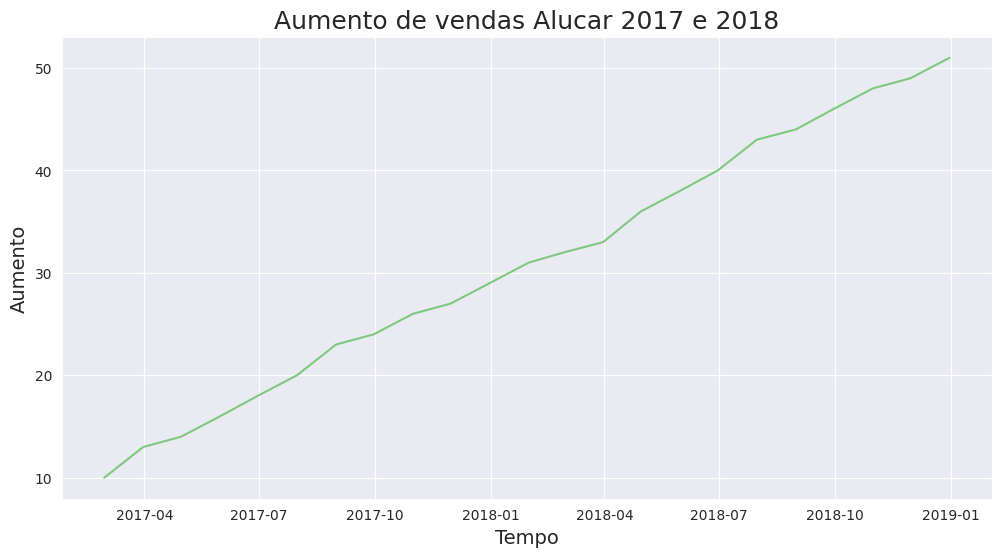

In [70]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title ('Aumento de vendas Alucar 2017 e 2018', loc='center',fontsize=18)
ax.set_xlabel('Tempo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [71]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title (titulo, loc='center',fontsize=18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

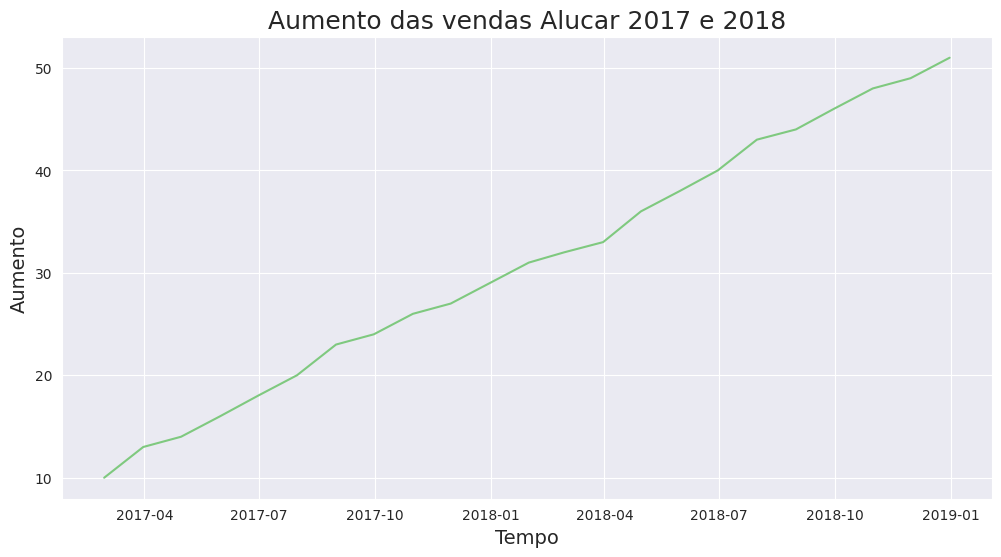

In [72]:
plotar('Aumento das vendas Alucar 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [73]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,crescimento_direto,aumento,aceleracao
0,2017-01-31,10,NaN,NaN,NaN
1,2017-02-28,20,1.000000,10.0,NaN
2,2017-03-31,33,0.650000,13.0,3.0
3,2017-04-30,47,0.424242,14.0,1.0
4,2017-05-31,63,0.340426,16.0,2.0


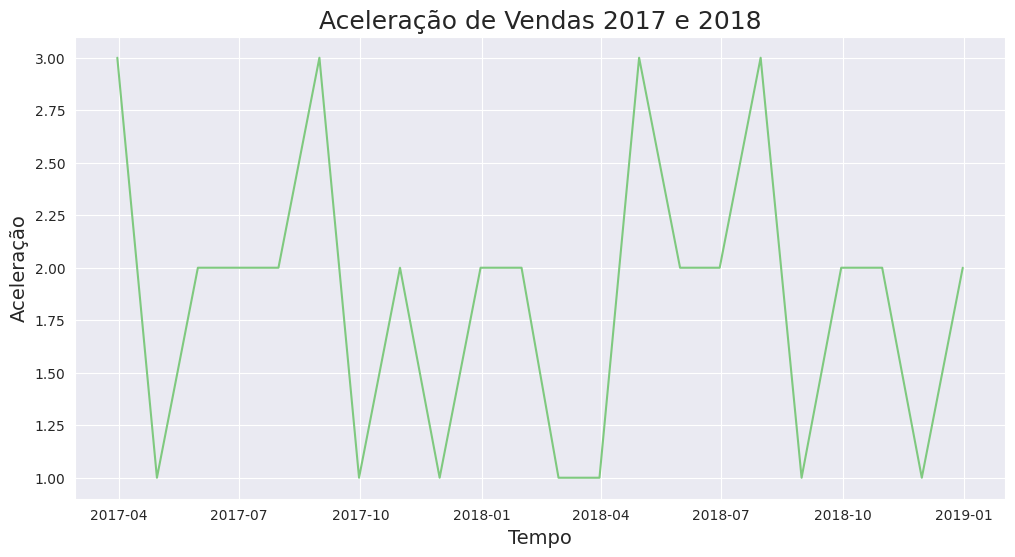

In [74]:
plotar ('Aceleração de Vendas 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao',alucar)

In [75]:
def plot_comparacao (x, y1, y2, y3,dataset,titulo):
  plt.figure(figsize =(16,12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(titulo, fontsize = 18, loc='center')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax =ax

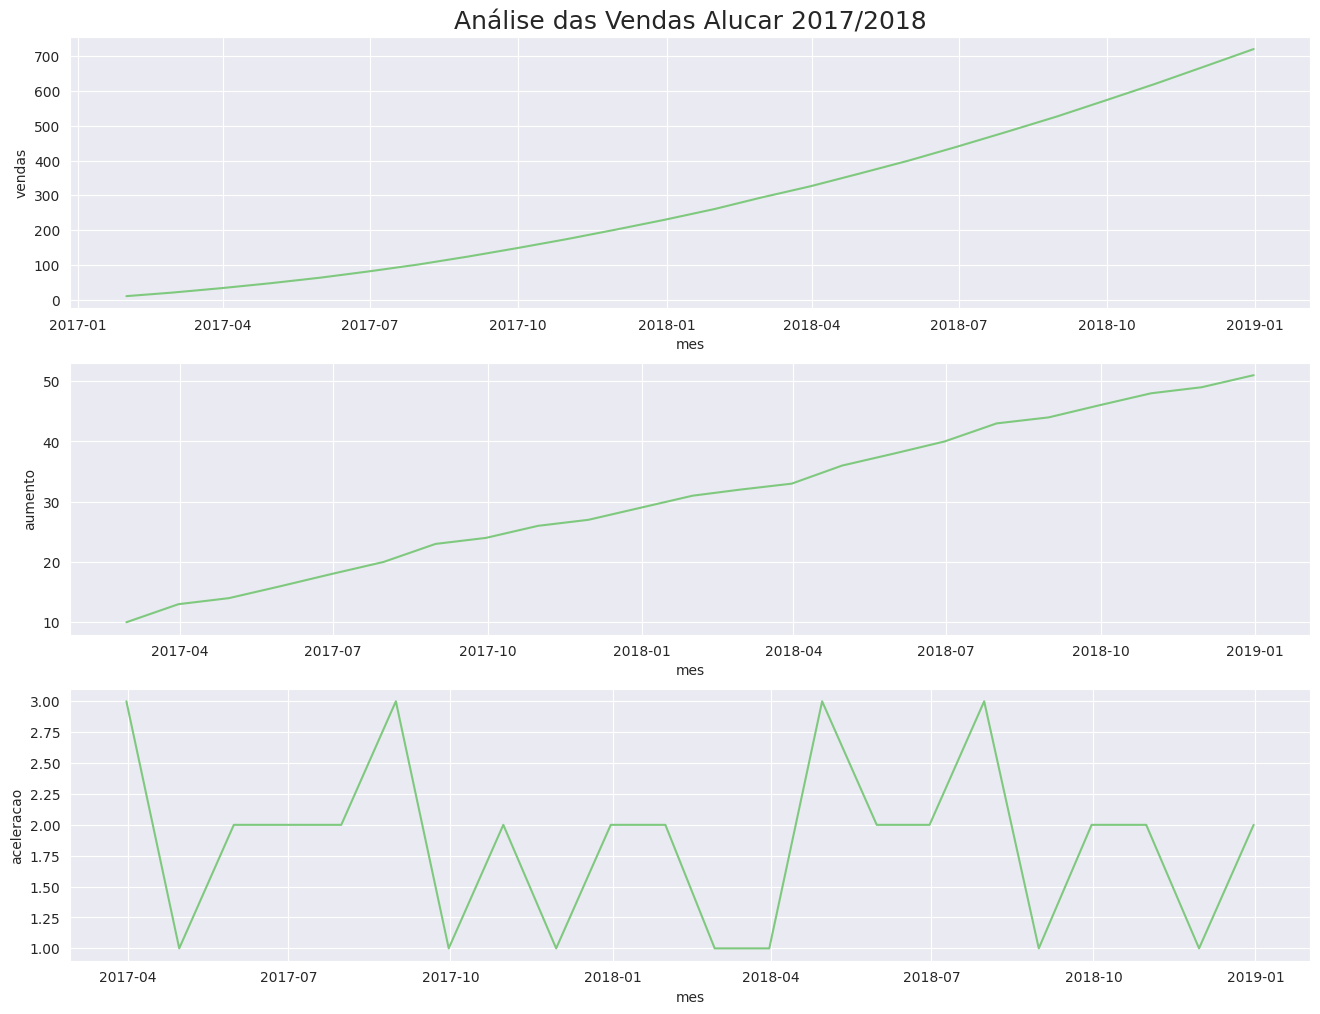

In [76]:
plot_comparacao('mes','vendas','aumento','aceleracao',alucar,'Análise das Vendas Alucar 2017/2018')

In [77]:
alucar.head(10)

,mes,vendas,crescimento_direto,aumento,aceleracao
0,2017-01-31,10,NaN,NaN,NaN
1,2017-02-28,20,1.000000,10.0,NaN
2,2017-03-31,33,0.650000,13.0,3.0
3,2017-04-30,47,0.424242,14.0,1.0
4,2017-05-31,63,0.340426,16.0,2.0
5,2017-06-30,81,0.285714,18.0,2.0
6,2017-07-31,101,0.246914,20.0,2.0
7,2017-08-31,124,0.227723,23.0,3.0
8,2017-09-30,148,0.193548,24.0,1.0
9,2017-10-31,174,0.175676,26.0,2.0


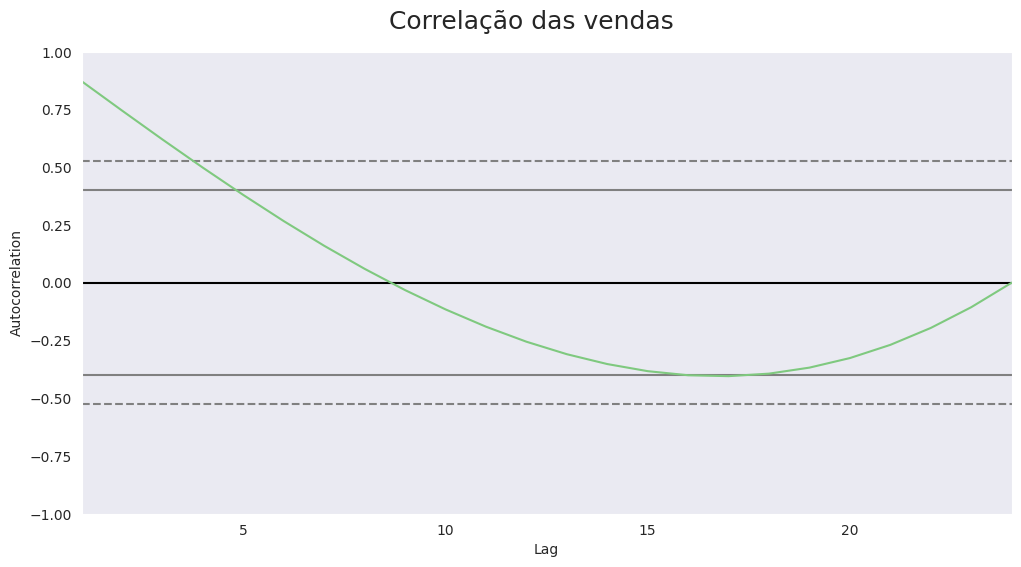

In [78]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize =18, y = 0.95)
autocorrelation_plot (alucar['vendas'])
ax = ax


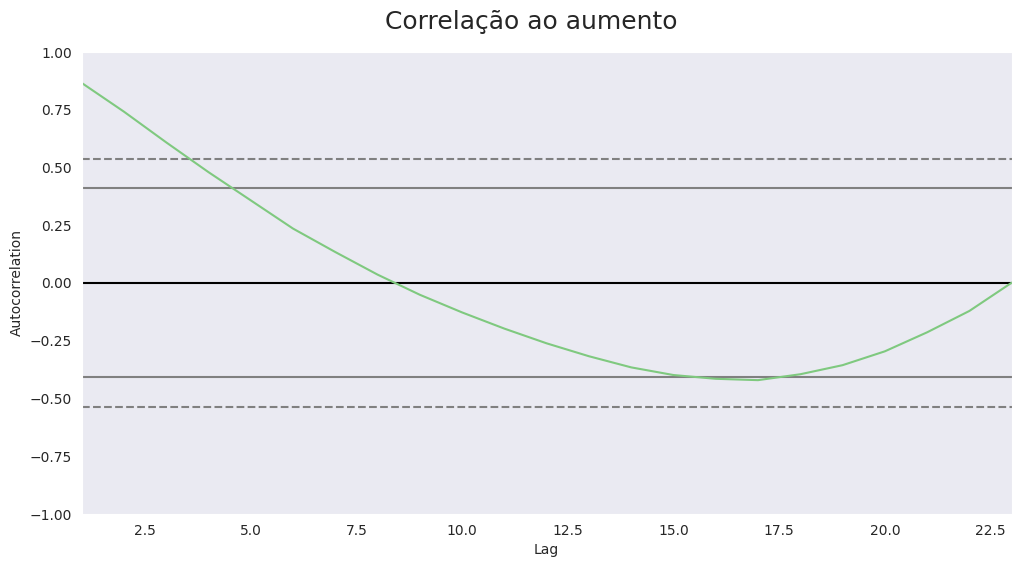

In [79]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação ao aumento', fontsize =18, y = 0.95)
autocorrelation_plot (alucar['aumento'] [1:])
ax = ax

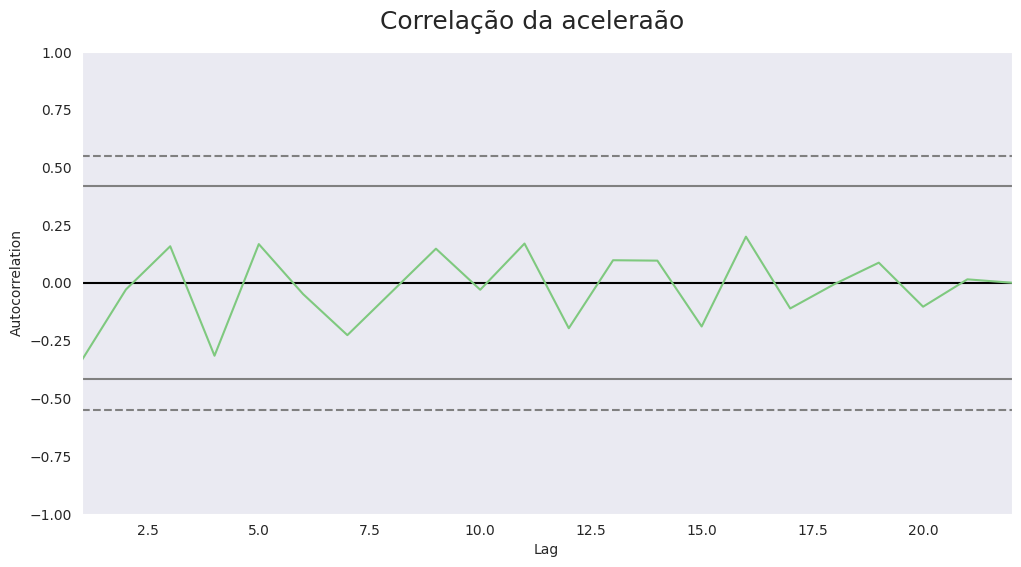

In [80]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleraão', fontsize =18, y = 0.95)
autocorrelation_plot (alucar['aceleracao'] [2:])
ax = ax

In [81]:
#Plotar as correlações em um único plot

### Alucar - Analisando assinantes da newsletter

In [82]:
assinantes = pd.read_csv("newsletter_alucar.csv")
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [83]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [84]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [85]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head(20)

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0
5,2017-06-30,66,17.0,2.0
6,2017-07-31,85,19.0,2.0
7,2017-08-31,107,22.0,3.0
8,2017-09-30,132,25.0,3.0
9,2017-10-31,160,28.0,3.0


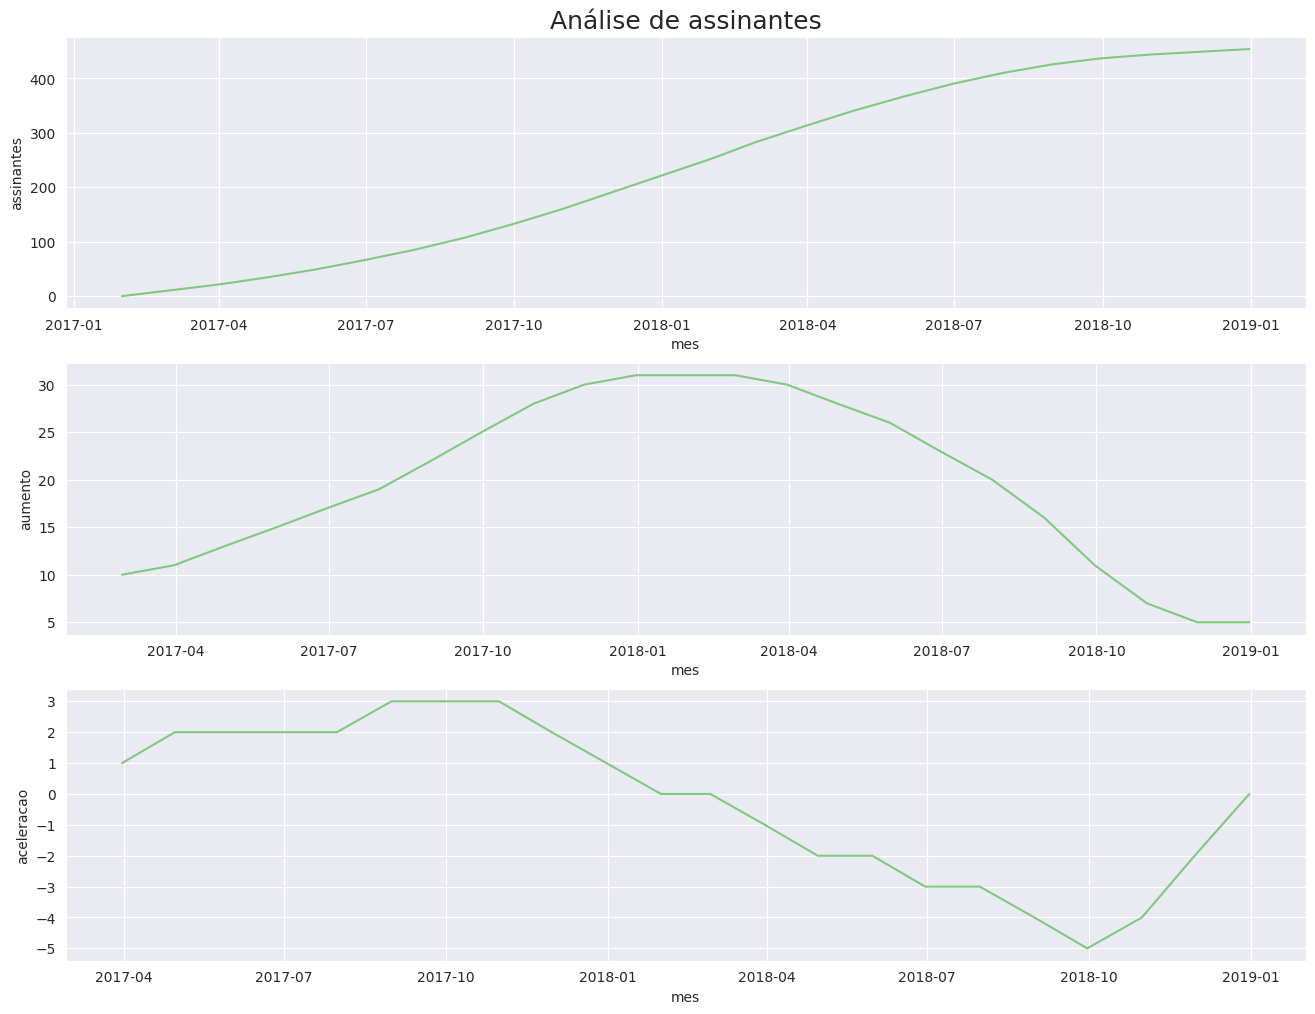

In [86]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes')

#Chocolura - Analisando as vendas

In [87]:
chocolura = pd.read_csv("chocolura.csv")
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [88]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [89]:
chocolura.mes = pd.to_datetime(chocolura.mes)
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [90]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['vendas'].diff()
chocolura.head(20)

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,-25.0
2,2017-03-01,209,24.0,24.0
3,2017-04-01,280,71.0,71.0
4,2017-05-01,211,-69.0,-69.0
5,2017-06-01,300,89.0,89.0
6,2017-07-01,210,-90.0,-90.0
7,2017-08-01,205,-5.0,-5.0
8,2017-09-01,208,3.0,3.0
9,2017-10-01,210,2.0,2.0


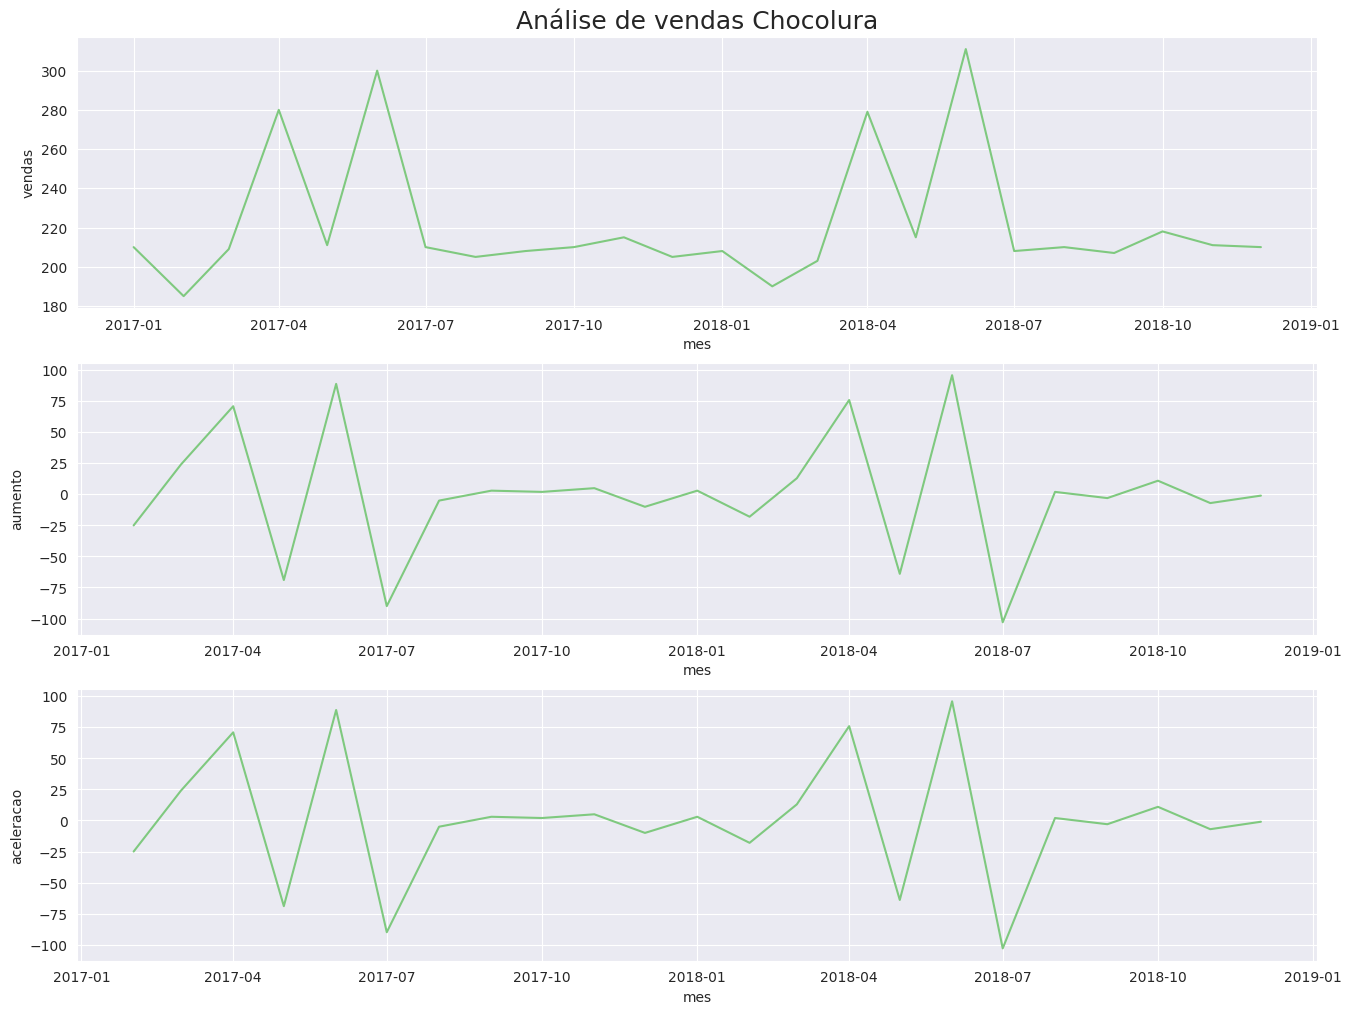

In [91]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas Chocolura')

#Chocolura Vendas Diárias

In [92]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [93]:
vendas_por_dia.dia = pd.to_datetime(vendas_por_dia.dia)
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [94]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['vendas'].diff()
vendas_por_dia.head(20)

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,-2.0
2,2018-10-03,56,8.0,8.0
3,2018-10-04,50,-6.0,-6.0
4,2018-10-05,51,1.0,1.0
5,2018-10-06,18,-33.0,-33.0
6,2018-10-07,20,2.0,2.0
7,2018-10-08,50,30.0,30.0
8,2018-10-09,53,3.0,3.0
9,2018-10-10,56,3.0,3.0


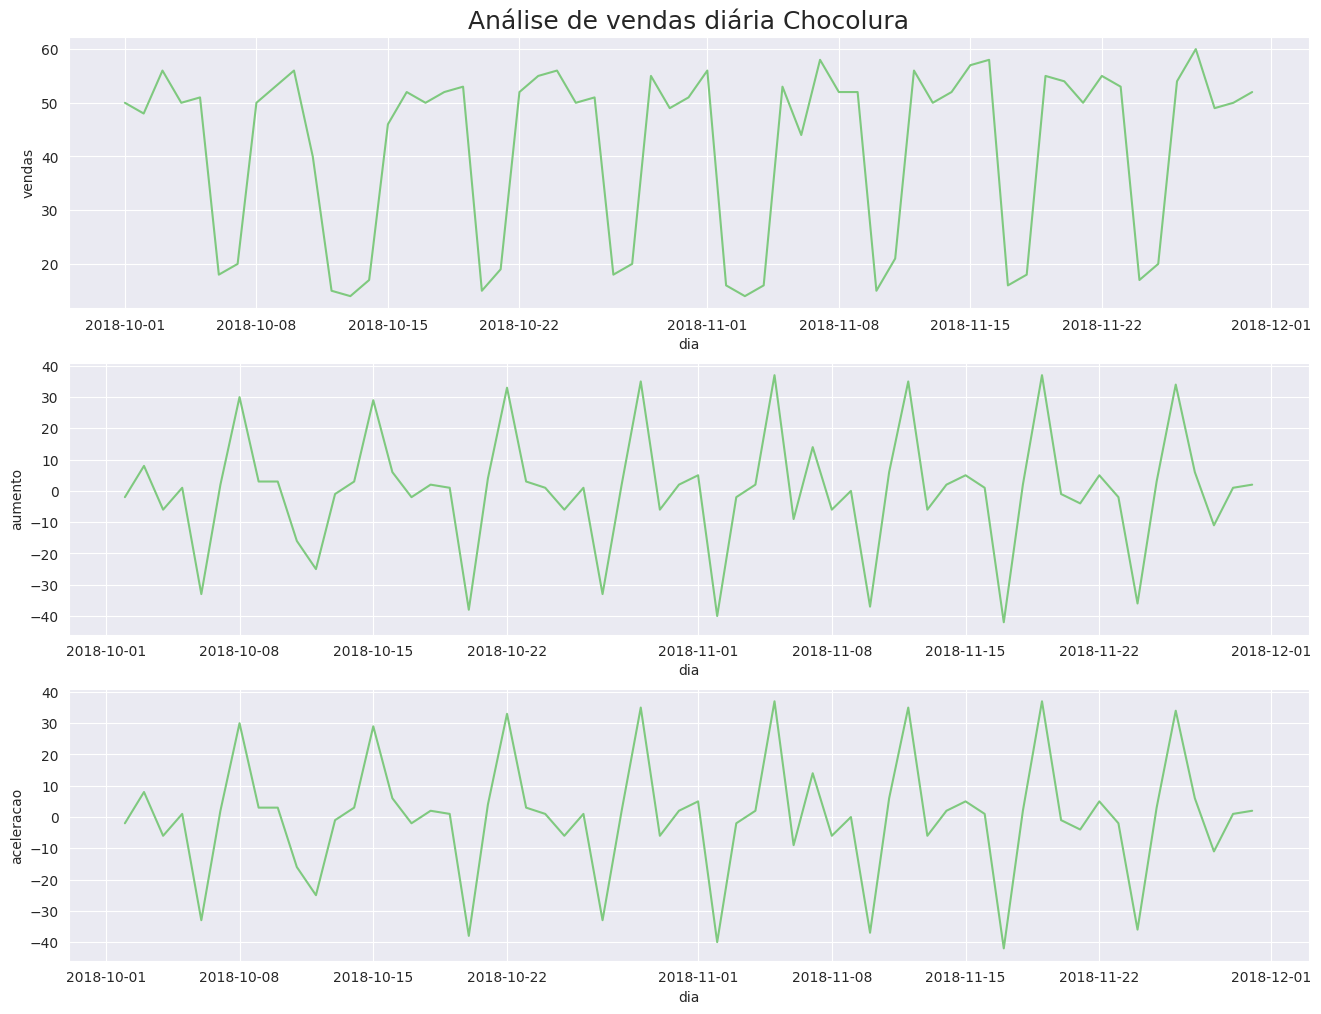

In [95]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas diária Chocolura')

##Analisando a sazionalidade

In [96]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,-2.0,Tuesday
2,2018-10-03,56,8.0,8.0,Wednesday
3,2018-10-04,50,-6.0,-6.0,Thursday
4,2018-10-05,51,1.0,1.0,Friday
5,2018-10-06,18,-33.0,-33.0,Saturday
6,2018-10-07,20,2.0,2.0,Sunday
7,2018-10-08,50,30.0,30.0,Monday
8,2018-10-09,53,3.0,3.0,Tuesday
9,2018-10-10,56,3.0,3.0,Wednesday


In [97]:
vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()

<ipython-input-97-0e27eb0a08e8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()


,vendas,aumento,aceleracao
dia_da_semana,,,
Friday,45.0,-7.0,-7.0
Monday,52.0,34.0,34.0
Saturday,16.0,-28.0,-28.0
Sunday,19.0,3.0,3.0
Thursday,51.0,-2.0,-2.0
Tuesday,52.0,-1.0,-1.0
Wednesday,53.0,1.0,1.0


###Correlação das vendas diarias

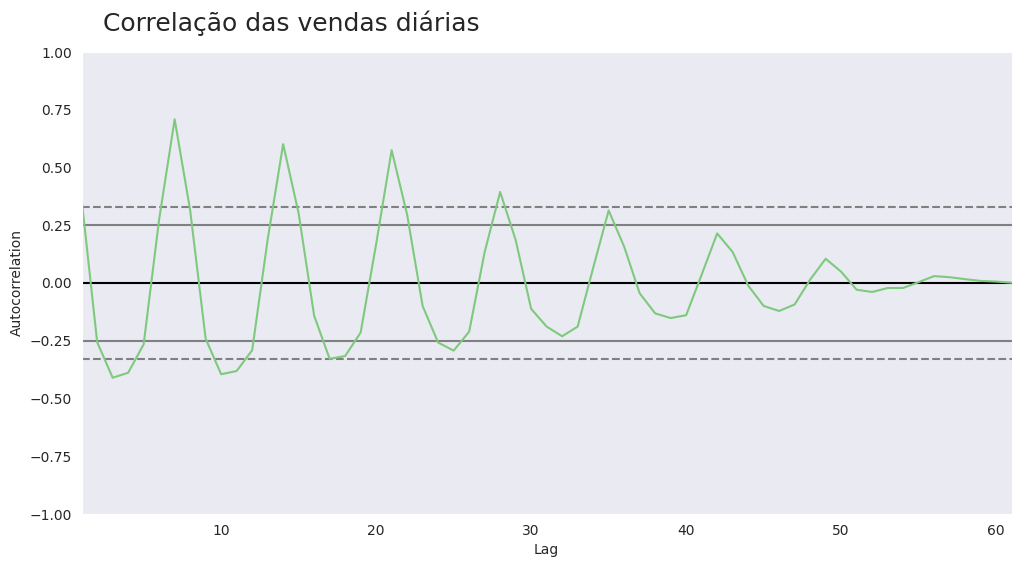

In [98]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize = 18, x = 0.3, y= 0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

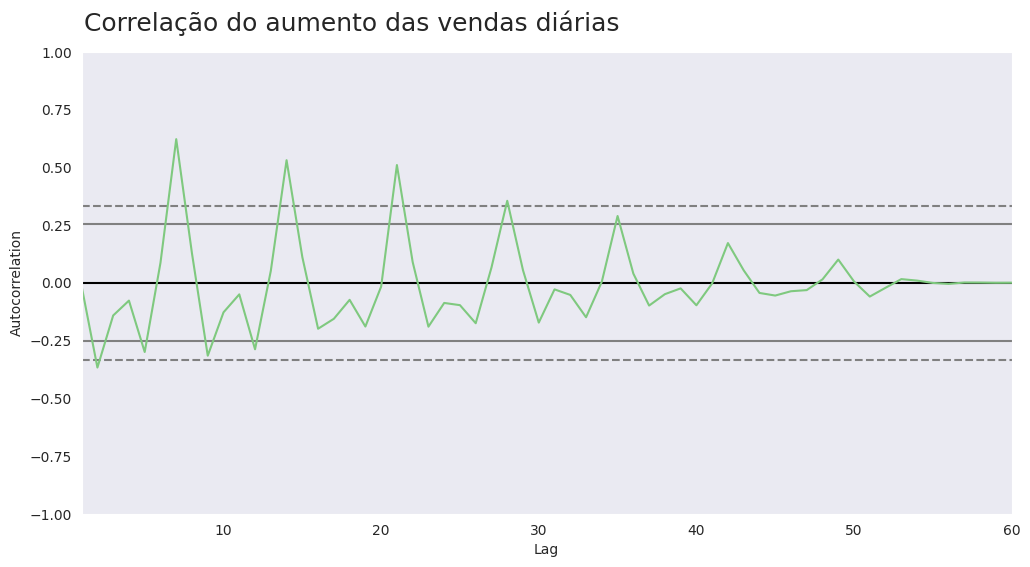

In [99]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize = 18, x = 0.35, y= 0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

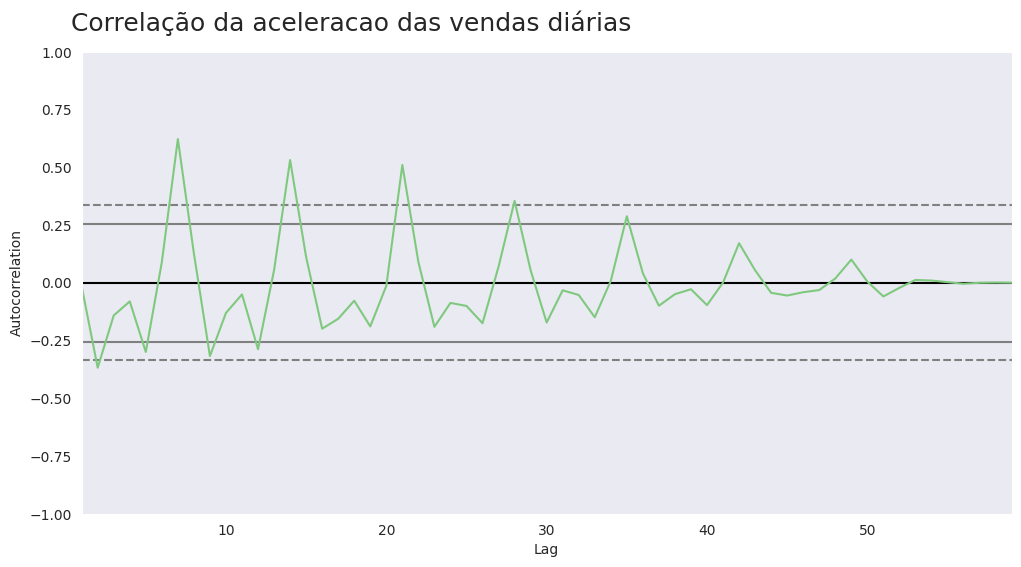

In [100]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleracao das vendas diárias', fontsize = 18, x = 0.35, y= 0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

##Cafelura

In [101]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [102]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [103]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [104]:
cafelura.shape

(24, 2)

In [105]:
cafelura.isna().sum().sum()

0

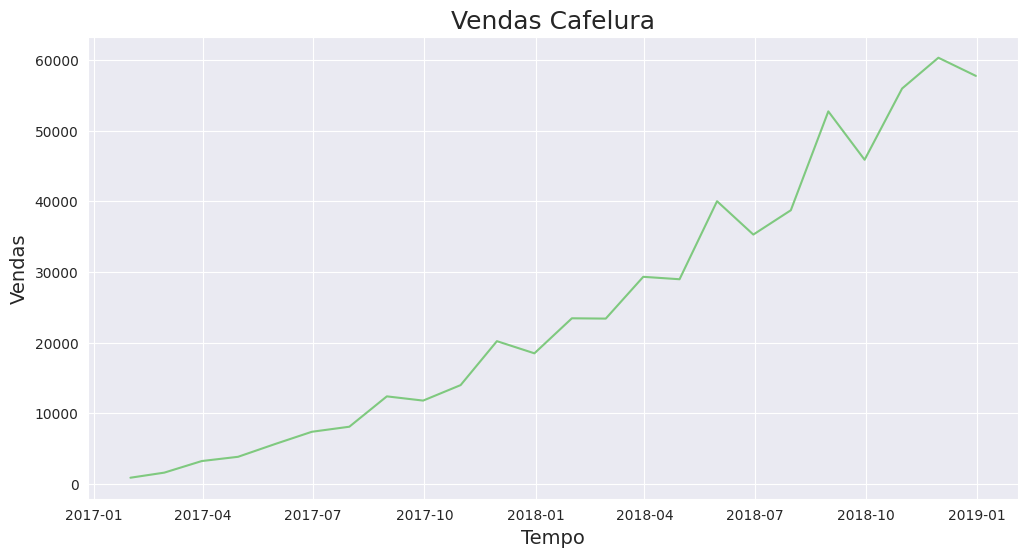

In [106]:
plotar('Vendas Cafelura','Tempo','Vendas','mes','vendas', cafelura)

In [107]:
quantidade_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [108]:
quantidade_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [109]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/quantidade_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


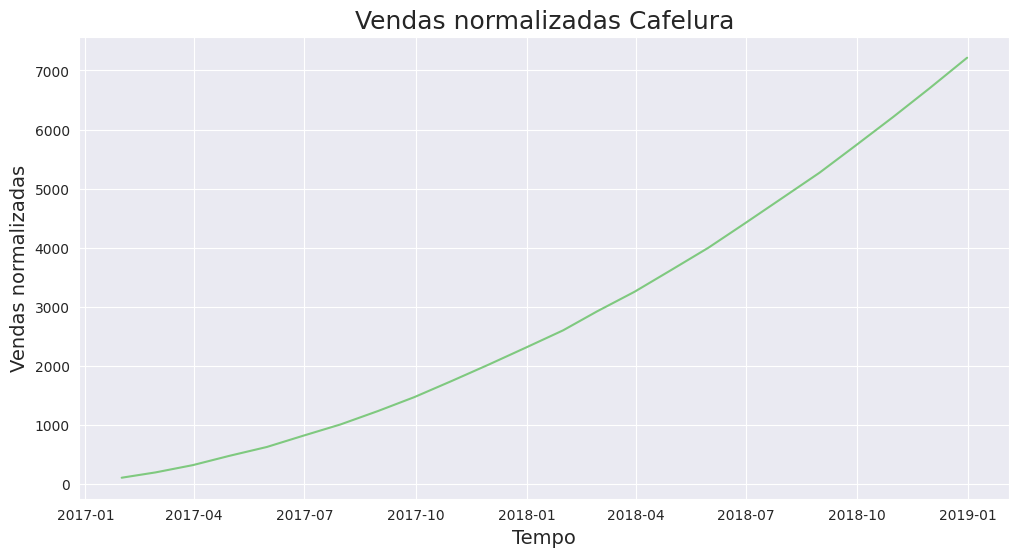

In [110]:
plotar('Vendas normalizadas Cafelura','Tempo','Vendas normalizadas','mes','vendas_normalizadas',cafelura)

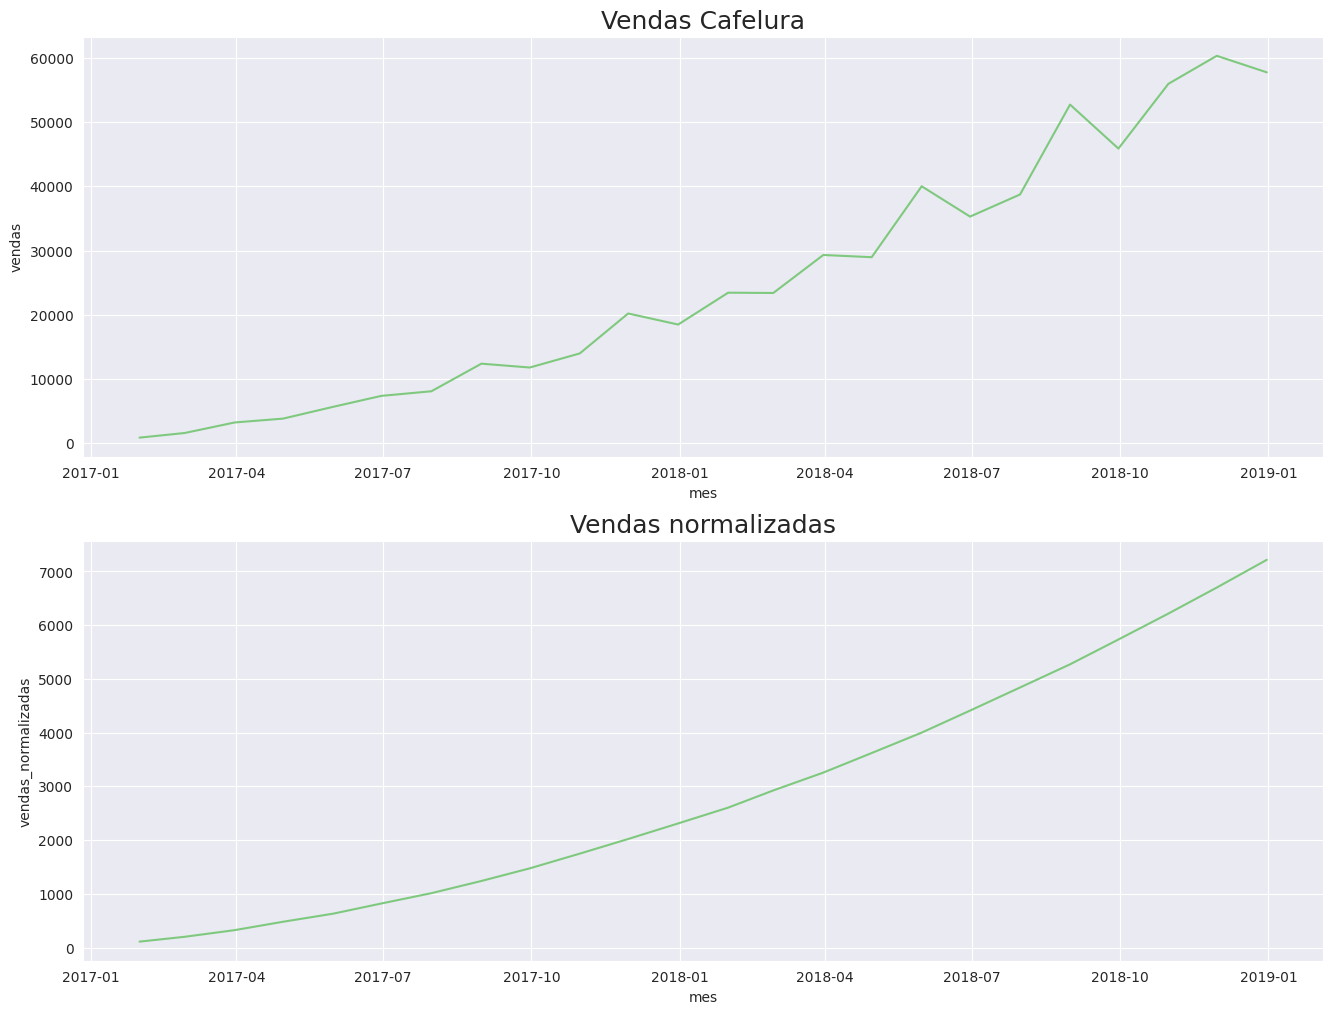

In [111]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura', fontsize =18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas', fontsize =18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

In [112]:
#estudar sempre a tendência
#sazonalidade
#ruídos, por isso é importante normalizar

###StatsModels

In [144]:
from statsmodels.tsa.seasonal import seasonal_decompose



In [145]:
statsmodels.__version__

'0.13.5'

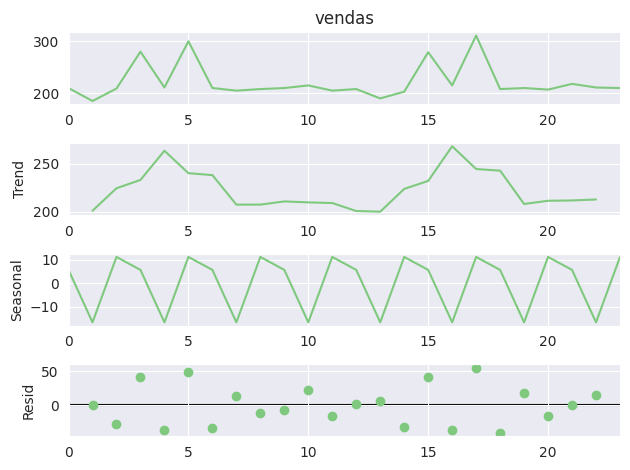

In [152]:
resultado = seasonal_decompose(chocolura['vendas'], period=3)
ax = resultado.plot()

# Alucel - Analise de vendas

In [153]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [154]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [155]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [156]:
alucel.shape

(61, 2)

In [157]:
alucel.isna().sum().sum()

0

In [159]:
alucel['aumento'] = alucel.vendas.diff()
alucel['acelerecao'] = alucel.aumento.diff()
alucel.head()

,dia,vendas,aumento,acelerecao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


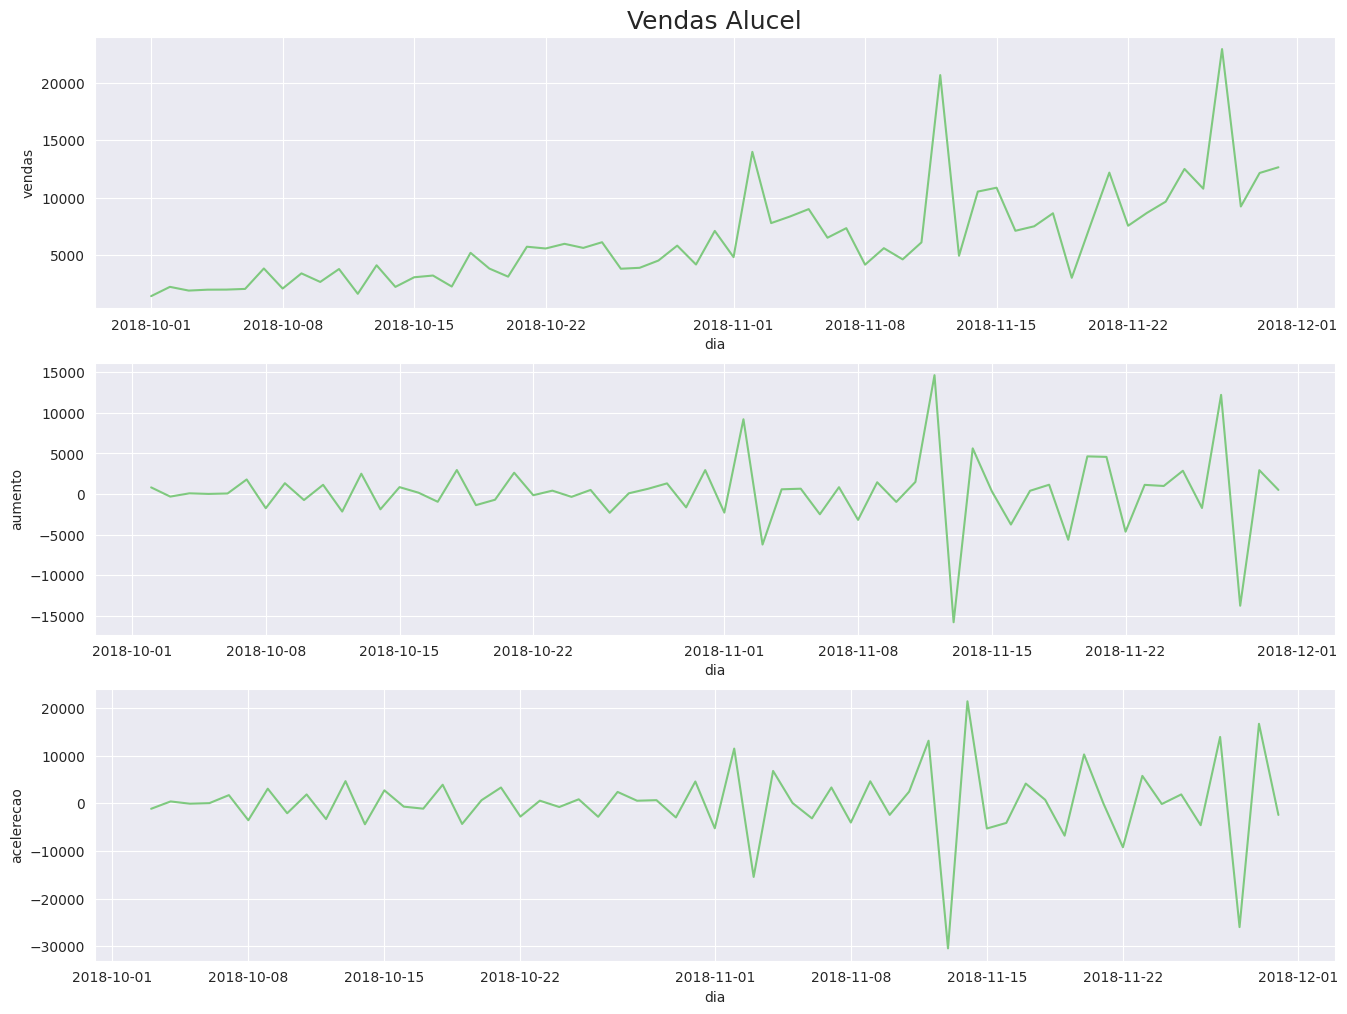

In [162]:
plot_comparacao ('dia', 'vendas','aumento','acelerecao', alucel, 'Vendas Alucel')

In [170]:
#tecnica de normalização média móvel

alucel['media_movel'] = alucel.vendas.rolling(7).mean().round(2)
alucel.tail(7)

,dia,vendas,aumento,acelerecao,media_movel
54,2018-11-24,9638.61,985.17,-136.69,8173.28
55,2018-11-25,12499.99,2861.38,1876.21,8727.37
56,2018-11-26,10773.53,-1726.46,-4587.84,9840.84
57,2018-11-27,22984.56,12211.03,13937.49,12037.21
58,2018-11-28,9216.26,-13768.30,-25979.33,11614.00
59,2018-11-29,12147.61,2931.35,16699.65,12273.43
60,2018-11-30,12646.44,498.83,-2432.52,12843.86


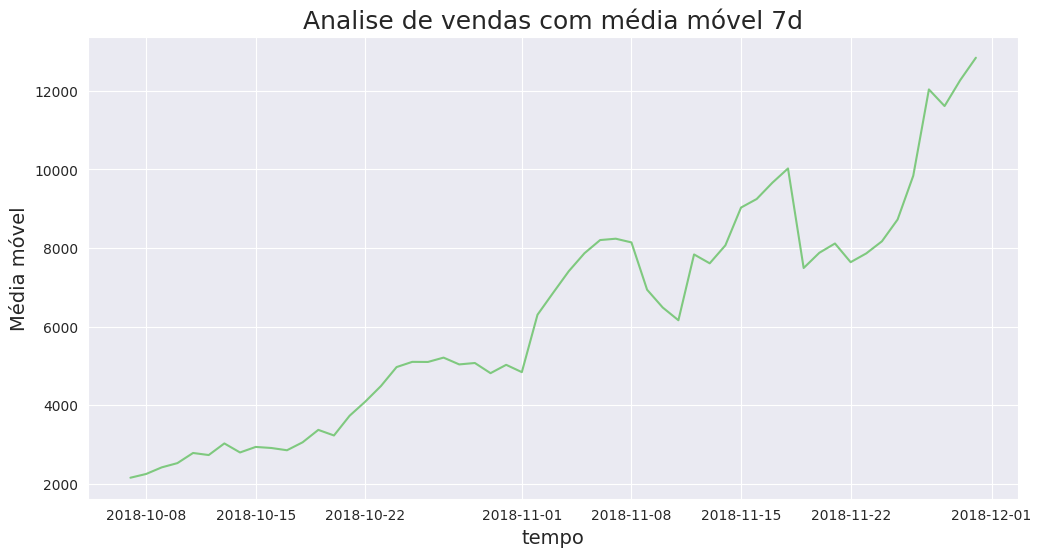

In [166]:
plotar("Analise de vendas com média móvel 7d", 'tempo','Média móvel', 'dia','media_movel',alucel)